In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
ratings = pd.read_csv('/content/drive/My Drive/rating.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movies = pd.read_csv('movie.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
len(ratings)

12419285

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
movies.duplicated().sum()

0

In [ ]:
all_genres = []
for genres_str in movies['genres']:
    genres_list = genres_str.split('|')
    all_genres.extend(genres_list)

genre_counts = pd.Series(all_genres).value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts.columns

Index(['Genre', 'Count'], dtype='object')

<ipython-input-9-053b30ce9261>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')


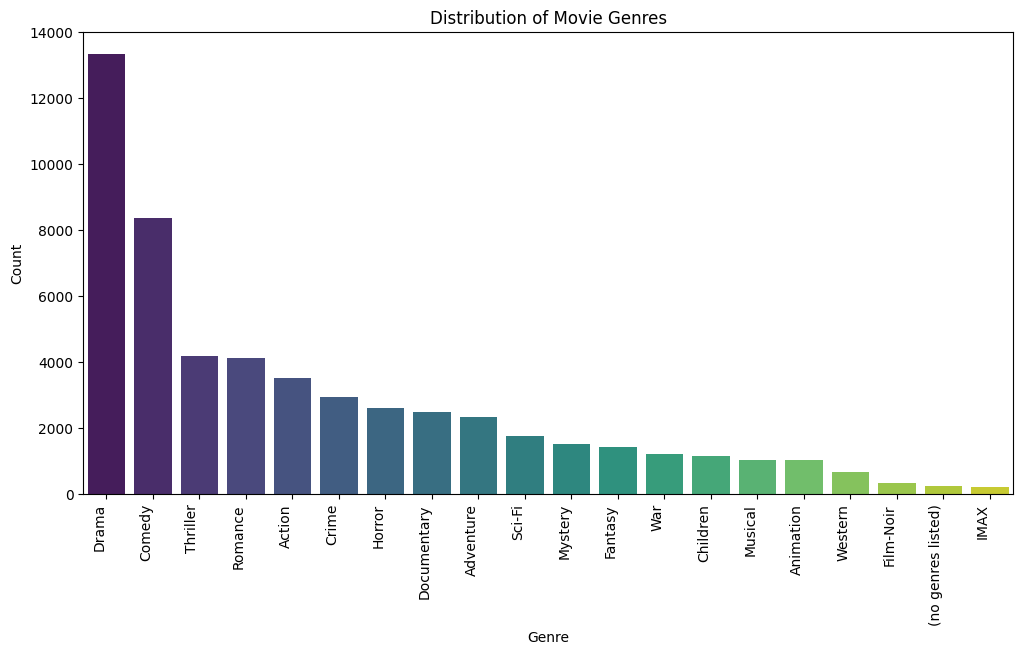

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=genre_counts, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

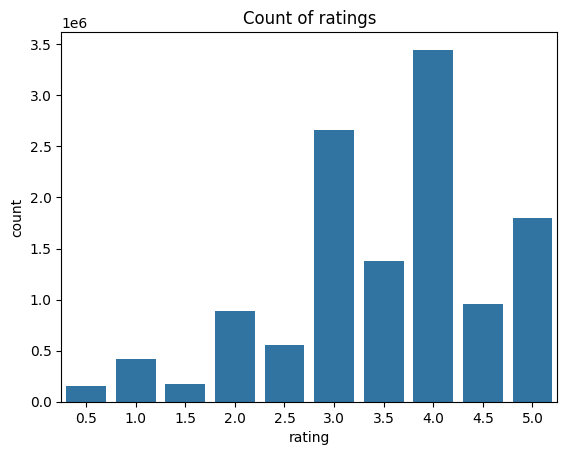

In [ ]:
# Plot a histogram of the ratings data
sns.countplot(data=ratings, x='rating')
plt.title('Count of ratings')
plt.show()

In [ ]:
print('Shape: \n\n', movies.shape)
    # Check the data types of each column in the movies data
print('Info: \n\n', movies.info())

    # Check the summary statistics of the movies data
print('Describe: \n\n', movies.describe())

    # Check for null values
print('Null values:\n\n', movies.isnull().sum())

    # Check for duplicated values
print('Duplicated values:\n\n',movies.duplicated().sum())

    # Display the first few rows of the data
print('First few rows:\n\n', movies.head())

Shape: 

 (27278, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
Info: 

 None
Describe: 

              movieId
count   27278.000000
mean    59855.480570
std     44429.314697
min         1.000000
25%      6931.250000
50%     68068.000000
75%    100293.250000
max    131262.000000
Null values:

 movieId    0
title      0
genres     0
dtype: int64
Duplicated values:

 0
First few rows:

    movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

         

In [ ]:
print('Shape: \n\n', ratings.shape)
    # Check the data types of each column in the ratings data
print('Info: \n\n', ratings.info())

    # Check the summary statistics of the ratings data
print('Describe: \n\n', ratings.describe())

    # Check for null values
print('Null values:\n\n', ratings.isnull().sum())

    # Check for duplicated values
print('Duplicated values:\n\n',ratings.duplicated().sum())

    # Display the first few rows of the data
print('First few rows:\n\n', ratings.head())

Shape: 

 (12419285, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12419285 entries, 0 to 12419284
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 379.0+ MB
Info: 

 None
Describe: 

              userId       movieId        rating
count  1.241928e+07  1.241928e+07  1.241928e+07
mean   4.276472e+04  9.075732e+03  3.524858e+00
std    2.486334e+04  1.981835e+04  1.052179e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    2.116300e+04  9.030000e+02  3.000000e+00
50%    4.272600e+04  2.174000e+03  3.500000e+00
75%    6.440800e+04  4.816000e+03  4.000000e+00
max    8.578800e+04  1.312600e+05  5.000000e+00
Null values:

 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Duplicated values:

 0
First few rows:

    userId  movieId  rating            timestamp
0       1        2

In [ ]:
print('Mean rating of a movie:',ratings['rating'].mean())
# userId: Unique Id provided for each user.
print('Number of users:', ratings['userId'].nunique())
print('Mean number of ratings for each user:', ratings.groupby(by='userId').size().mean())
print('Number of ratings made by each user:\n', ratings.groupby(by='userId').size())
print('Count of most given ratings in desc order:\n')
ratings['rating'].value_counts()

Mean rating of a movie: 3.5248581540724766
Number of users: 85788
Mean number of ratings for each user: 144.76715857695714
Number of ratings made by each user:
 userId
1        175
2         61
3        187
4         28
5         66
        ... 
85784     53
85785     25
85786    129
85787     53
85788    181
Length: 85788, dtype: int64
Count of most given ratings in desc order:



rating
4.0    3446921
3.0    2659199
5.0    1797318
3.5    1374316
4.5     955176
2.0     889165
2.5     553000
1.0     420266
1.5     172891
0.5     151033
Name: count, dtype: int64

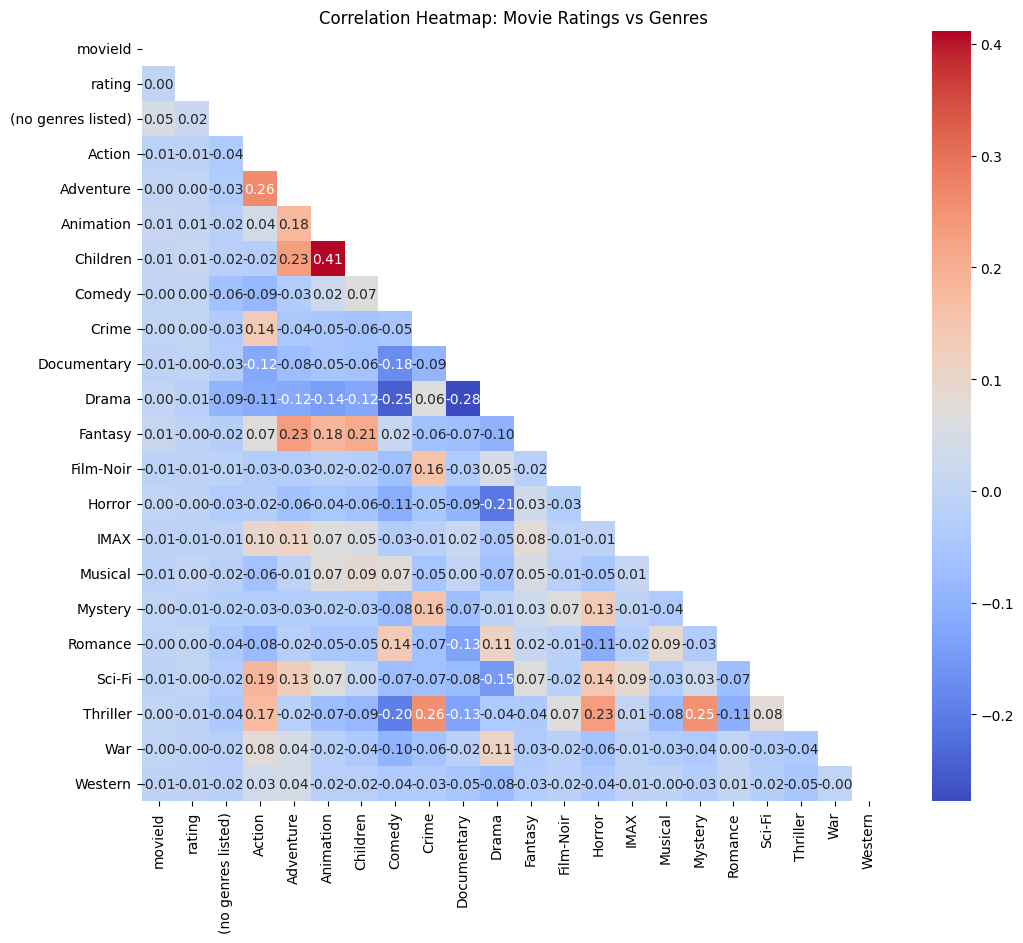

In [ ]:
genres = movies['genres'].str.get_dummies('|')

# Merge ratings and genres
movie_ratings = pd.concat([ratings[['movieId', 'rating']], genres], axis=1)

# Calculate correlation matrix
correlation_matrix = movie_ratings.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Set title
plt.title('Correlation Heatmap: Movie Ratings vs Genres')

# Show plot
plt.show()